# MAXIMUM TEMPERATURE PREDICTION USING DEEP LEARNING
@author: Gbangou T. (November 2022)

* In this notebook we forecasting daily maximum temperature time series at Ada station, in Ghana (West-Africa) using different deep learning models.
* Both univariate and multivariate approaches are used

IMPORTING MODULES

In [94]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import drive

LOAD THE DATA

In [95]:
drive.mount('content.drive/')

Mounted at content.drive/


In [96]:
df=pd.read_csv('/content/content.drive/MyDrive/colabnotes/weather_temp/Daily_Data_Synoptic.csv')
df.head()

,STATION,YEAR,MONTH,DAY,RAINFALL AMOUNT,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE
0,WA,1960,1,1,0.0,32.2,16.1
1,WA,1960,1,2,0.0,32.2,16.7
2,WA,1960,1,3,0.0,31.7,17.2
3,WA,1960,1,4,0.0,32.8,17.8
4,WA,1960,1,5,0.0,34.4,17.8


ADA STATION DATA

In [97]:
df.STATION.unique()

array(['WA', 'NAVRONGO', 'BOLE', 'TAMALE', 'YENDI', 'KETE KRACHI', 'HO',
       'WENCHI', 'SUNYANI', 'AKUSE', 'ABETIFI', 'AKATSI', 'SEFWI BEKWAI',
       'KUMASI', 'AKIM ODA', 'KOFORIDUA', 'AXIM', 'ADA', 'TAKORADI',
       'ACCRA', 'TEMA', 'SALTPOND'], dtype=object)

In [98]:
dfada = df[df['STATION']=='ADA']
dfada.head(), dfada.tail()

(       STATION  YEAR  MONTH  DAY  RAINFALL AMOUNT  MAXIMUM TEMPERATURE  \
 297313     ADA  1960      1    1              0.0                 31.1   
 297314     ADA  1960      1    2              0.0                 31.7   
 297315     ADA  1960      1    3              0.0                 31.7   
 297316     ADA  1960      1    4              0.0                 31.7   
 297317     ADA  1960      1    5              0.0                 30.6   
 
         MINIMUM TEMPERATURE  
 297313                 20.6  
 297314                 20.0  
 297315                 19.4  
 297316                 21.1  
 297317                 23.3  ,
        STATION  YEAR  MONTH  DAY  RAINFALL AMOUNT  MAXIMUM TEMPERATURE  \
 316301     ADA  2011     12   27              0.0                 31.8   
 316302     ADA  2011     12   28              0.0                 31.5   
 316303     ADA  2011     12   29              0.0                 29.6   
 316304     ADA  2011     12   30              0.0           

# FEATURE ENGINEERING

* Checking missing values percentage 
-set date as index
-Treating missing values
-Adding additional features (for multivariate forecasting)
-Visualisation

In [99]:
dfada["DATE"]=pd.to_datetime(dfada.DAY.astype("string")+"-"+dfada.MONTH.astype("string")+"-"+dfada.YEAR.astype("string"),dayfirst=True)
dfada.set_index('DATE',inplace=True)
dfada=dfada.drop(columns=['YEAR','MONTH','DAY'])
dfada.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATION,RAINFALL AMOUNT,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE
DATE,,,,
1960-01-01,ADA,0.0,31.1,20.6
1960-01-02,ADA,0.0,31.7,20.0
1960-01-03,ADA,0.0,31.7,19.4
1960-01-04,ADA,0.0,31.7,21.1
1960-01-05,ADA,0.0,30.6,23.3


In [100]:
dfada.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18993 entries, 1960-01-01 to 2011-12-31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION              18993 non-null  object 
 1   RAINFALL AMOUNT      18993 non-null  float64
 2   MAXIMUM TEMPERATURE  18993 non-null  float64
 3   MINIMUM TEMPERATURE  18993 non-null  float64
dtypes: float64(3), object(1)
memory usage: 741.9+ KB


In [101]:
dfada.columns=["STATION","RAINF","TEMP_MAX","TEMP_MIN"] #renaming variables

In [102]:
dfada=dfada.replace([-99.9], np.nan)

In [103]:
dfada.apply(pd.isnull).sum()

STATION       0
RAINF        94
TEMP_MAX    124
TEMP_MIN    498
dtype: int64

In [104]:
dfada.apply(pd.isnull).sum()/dfada.shape[0]*100 # We have less than 2% for each variable

STATION     0.000000
RAINF       0.494919
TEMP_MAX    0.652872
TEMP_MIN    2.622019
dtype: float64

In [105]:
dfada.dropna(inplace=True) #let's drop nan

In [106]:
dfada.describe()

,RAINF,TEMP_MAX,TEMP_MIN
count,18402.000000,18402.000000,18402.000000
mean,2.336376,31.218422,24.869661
std,9.595396,2.198247,2.016464
min,0.000000,0.600000,-12.800000
25%,0.000000,30.000000,23.500000
50%,0.000000,31.700000,25.000000
75%,0.000000,32.800000,26.300000
max,205.700000,38.600000,37.200000


In [107]:
dfada.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2011-12-22', '2011-12-23', '2011-12-24', '2011-12-25',
               '2011-12-26', '2011-12-27', '2011-12-28', '2011-12-29',
               '2011-12-30', '2011-12-31'],
              dtype='datetime64[ns]', name='DATE', length=18402, freq=None)

In [108]:
dfada.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011],
           dtype='int64', name='DATE', length=18402)

Additional temperature related features for multivariate forecasting

In [109]:
cols = ['TEMP_MAX','RAINF', 'TEMP_MIN']
dfada= dfada[cols] # reordering columns
dfada["MONTHLY_AVG"] = dfada["TEMP_MAX"].groupby(dfada.index.month).apply(lambda x: x.expanding(1).mean())
dfada["DAY_OF_YEAR_AVG"] = dfada["TEMP_MAX"].groupby(dfada.index.day_of_year).apply(lambda x: x.expanding(1).mean())

dfada.head()

,TEMP_MAX,RAINF,TEMP_MIN,MONTHLY_AVG,DAY_OF_YEAR_AVG
DATE,,,,,
1960-01-01,31.1,0.0,20.6,31.10,31.1
1960-01-02,31.7,0.0,20.0,31.40,31.7
1960-01-03,31.7,0.0,19.4,31.50,31.7
1960-01-04,31.7,0.0,21.1,31.55,31.7
1960-01-05,30.6,0.0,23.3,31.36,30.6


Visualization of features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f224bb46cd0>,
      dtype=object)

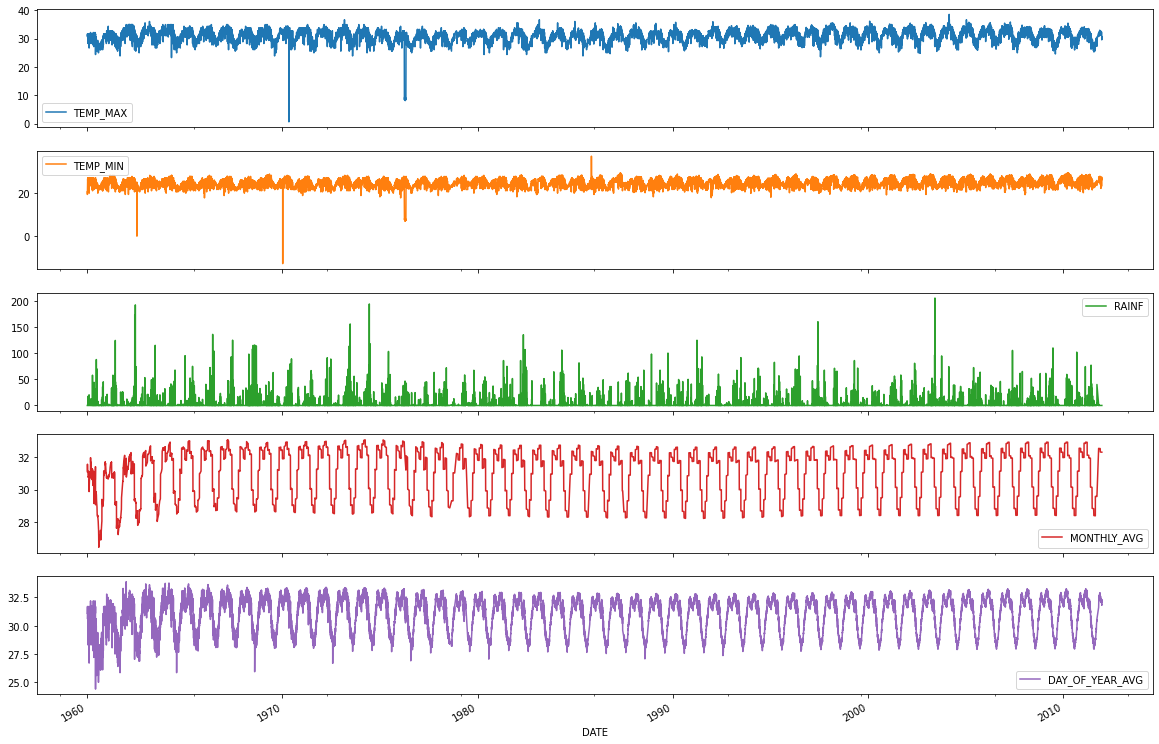

In [110]:
dfada[["TEMP_MAX", "TEMP_MIN","RAINF","MONTHLY_AVG","DAY_OF_YEAR_AVG"]].plot(figsize=(20,14),subplots=True)

# Univariate maximum temperature forecasting

* LSTM model1 (univariate)
* CNN model2 (univariate)
* GRU model3 (univariate)

* LSTM model

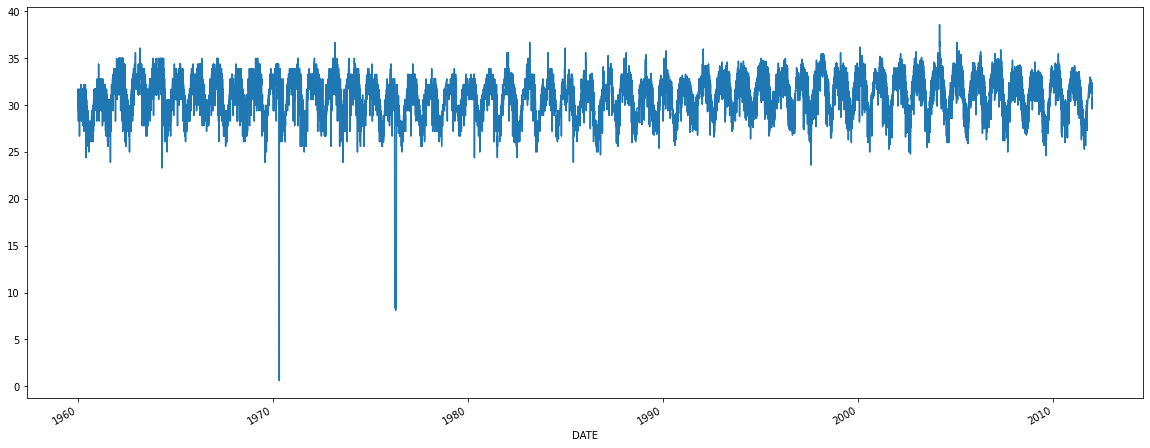

In [111]:
temp = dfada['TEMP_MAX']
temp.head()
temp.plot(figsize=(20,8))

In [112]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [113]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((18397, 5, 1), (18397,))

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train1, X_rem1, y_train1, y_rem1 = train_test_split(X1,y1, train_size=0.8, random_state=123,shuffle=False)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_rem1,y_rem1, test_size=0.5,random_state=123,shuffle=False)
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((14717, 5, 1), (14717,), (1840, 5, 1), (1840,), (1840, 5, 1), (1840,))

In [116]:
#X_train1, y_train1 = X1[:60000], y1[:60000]
#X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
#X_test1, y_test1 = X1[65000:], y1[65000:]
#X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [118]:
cp1 = ModelCheckpoint('/content/content.drive/MyDrive/colabnotes/weather_temp/model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [119]:
history1= model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
455/460 [============================>.] - ETA: 0s - loss: 748.9569 - root_mean_squared_error: 27.3671

460/460 [==============================] - 12s 20ms/step - loss: 746.1553 - root_mean_squared_error: 27.3158 - val_loss: 519.9065 - val_root_mean_squared_error: 22.8015
Epoch 2/10
454/460 [============================>.] - ETA: 0s - loss: 318.5706 - root_mean_squared_error: 17.8485

460/460 [==============================] - 9s 19ms/step - loss: 316.7492 - root_mean_squared_error: 17.7974 - val_loss: 198.4277 - val_root_mean_squared_error: 14.0864
Epoch 3/10
457/460 [============================>.] - ETA: 0s - loss: 104.1313 - root_mean_squared_error: 10.2045

460/460 [==============================] - 8s 18ms/step - loss: 103.8133 - root_mean_squared_error: 10.1889 - val_loss: 58.9420 - val_root_mean_squared_error: 7.6774
Epoch 4/10
460/460 [==============================] - ETA: 0s - loss: 26.6602 - root_mean_squared_error: 5.1633

460/460 [==============================] - 8s 16ms/step - loss: 26.6602 - root_mean_squared_error: 5.1633 - val_loss: 15.6141 - val_root_mean_squared_error: 3.9515
Epoch 5/10
459/460 [============================>.] - ETA: 0s - loss: 7.3055 - root_mean_squared_error: 2.7029

460/460 [==============================] - 8s 16ms/step - loss: 7.2969 - root_mean_squared_error: 2.7013 - val_loss: 6.3879 - val_root_mean_squared_error: 2.5274
Epoch 6/10
449/460 [============================>.] - ETA: 0s - loss: 3.7280 - root_mean_squared_error: 1.9308

460/460 [==============================] - 8s 16ms/step - loss: 3.7398 - root_mean_squared_error: 1.9339 - val_loss: 3.6995 - val_root_mean_squared_error: 1.9234
Epoch 7/10
460/460 [==============================] - ETA: 0s - loss: 2.3599 - root_mean_squared_error: 1.5362

460/460 [==============================] - 8s 17ms/step - loss: 2.3599 - root_mean_squared_error: 1.5362 - val_loss: 2.3827 - val_root_mean_squared_error: 1.5436
Epoch 8/10
460/460 [==============================] - ETA: 0s - loss: 1.7184 - root_mean_squared_error: 1.3109

460/460 [==============================] - 9s 19ms/step - loss: 1.7184 - root_mean_squared_error: 1.3109 - val_loss: 1.7936 - val_root_mean_squared_error: 1.3393
Epoch 9/10
453/460 [============================>.] - ETA: 0s - loss: 1.4713 - root_mean_squared_error: 1.2130

460/460 [==============================] - 9s 20ms/step - loss: 1.4642 - root_mean_squared_error: 1.2100 - val_loss: 1.5338 - val_root_mean_squared_error: 1.2385
Epoch 10/10
458/460 [============================>.] - ETA: 0s - loss: 1.3905 - root_mean_squared_error: 1.1792

460/460 [==============================] - 8s 17ms/step - loss: 1.3906 - root_mean_squared_error: 1.1793 - val_loss: 1.3909 - val_root_mean_squared_error: 1.1794


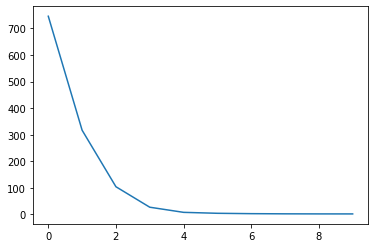

In [120]:
loss_per_epoch = history1.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [121]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/content.drive/MyDrive/colabnotes/weather_temp/model1/')

In [122]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

460/460 [==============================] - 2s 2ms/step


,Train Predictions,Actuals
0,31.652870,30.6
1,31.388269,31.1
2,31.240808,30.6
3,31.145376,31.1
4,31.283459,30.6
...,...,...
14712,28.534285,29.0
14713,28.919977,29.6
14714,29.271475,30.0
14715,29.782240,29.5


In [123]:
train_predictions.shape

(14717,)

In [124]:
model1_train_results=pd.DataFrame(data={'Actuals':temp[5:train_predictions.shape[0]+5],'Train Predictions':train_predictions})
model1_train_results

,Actuals,Train Predictions
DATE,,
1960-01-06,30.6,31.652870
1960-01-07,31.1,31.388269
1960-01-08,30.6,31.240808
1960-01-09,31.1,31.145376
1960-01-10,30.6,31.283459
...,...,...
2001-08-25,29.0,28.534285
2001-08-26,29.6,28.919977
2001-08-27,30.0,29.271475


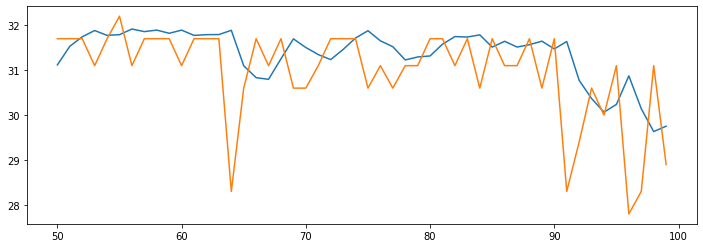

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [126]:
model1_train_results.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001],
           dtype='int64', name='DATE', length=14717)

Text(0, 0.5, 'Temperature(°C)')

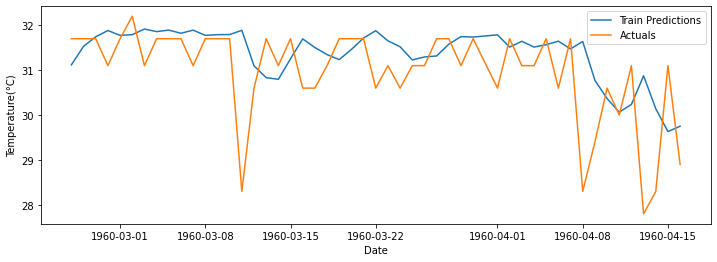

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(model1_train_results['Train Predictions'][50:100])
plt.plot(model1_train_results['Actuals'][50:100])
plt.legend(['Train Predictions','Actuals'])
plt.xlabel("Date")
plt.ylabel("Temperature(°C)")

In [128]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

58/58 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,30.151030,29.0
1,29.860180,30.5
2,30.187654,29.0
3,29.888884,29.2
4,29.923487,30.2
...,...,...
1835,32.020844,30.8
1836,31.788664,32.5
1837,31.884024,33.3
1838,32.254345,28.5


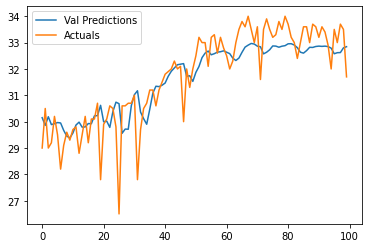

In [129]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
plt.legend(['Val Predictions','Actuals'])

In [130]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

58/58 [==============================] - 0s 4ms/step


,Test Predictions,Actuals
0,31.260895,31.9
1,30.957289,32.8
2,31.741758,28.5
3,31.383947,30.9
4,31.260904,32.4
...,...,...
1835,32.171436,31.8
1836,32.067722,31.5
1837,31.969082,29.6
1838,31.408638,30.8


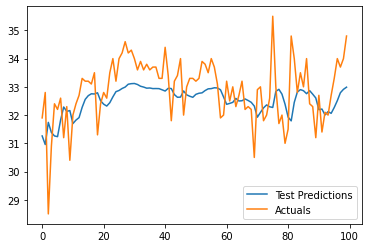

In [131]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])
plt.legend(['Test Predictions','Actuals'])

Summary function for the test data prediction

In [132]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

58/58 [==============================] - 0s 3ms/step


(      Predictions  Actuals
 0       31.260895     31.9
 1       30.957289     32.8
 2       31.741758     28.5
 3       31.383947     30.9
 4       31.260904     32.4
 ...           ...      ...
 1835    32.171436     31.8
 1836    32.067722     31.5
 1837    31.969082     29.6
 1838    31.408638     30.8
 1839    31.156904     30.1
 
 [1840 rows x 2 columns], 1.0915880750350897)

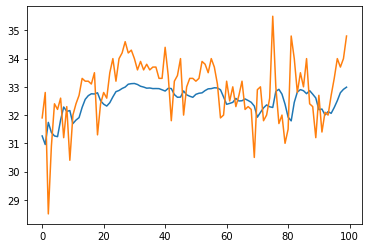

In [133]:
plot_predictions1(model1, X_test1, y_test1)

* CNN model2

In [134]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 2056      
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [135]:
cp2 = ModelCheckpoint('/content/content.drive/MyDrive/colabnotes/weather_temp/model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [136]:
history2=model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
457/460 [============================>.] - ETA: 0s - loss: 498.7955 - root_mean_squared_error: 22.3337

460/460 [==============================] - 3s 6ms/step - loss: 496.0926 - root_mean_squared_error: 22.2731 - val_loss: 76.3741 - val_root_mean_squared_error: 8.7392
Epoch 2/10
444/460 [===========================>..] - ETA: 0s - loss: 14.3762 - root_mean_squared_error: 3.7916

460/460 [==============================] - 2s 4ms/step - loss: 13.9881 - root_mean_squared_error: 3.7401 - val_loss: 1.2948 - val_root_mean_squared_error: 1.1379
Epoch 3/10
453/460 [============================>.] - ETA: 0s - loss: 1.5052 - root_mean_squared_error: 1.2268

460/460 [==============================] - 2s 5ms/step - loss: 1.5008 - root_mean_squared_error: 1.2251 - val_loss: 1.2679 - val_root_mean_squared_error: 1.1260
Epoch 4/10
436/460 [===========================>..] - ETA: 0s - loss: 1.5100 - root_mean_squared_error: 1.2288

460/460 [==============================] - 2s 4ms/step - loss: 1.4974 - root_mean_squared_error: 1.2237 - val_loss: 1.2674 - val_root_mean_squared_error: 1.1258
Epoch 5/10
459/460 [============================>.] - ETA: 0s - loss: 1.4984 - root_mean_squared_error: 1.2241

460/460 [==============================] - 2s 5ms/step - loss: 1.4964 - root_mean_squared_error: 1.2233 - val_loss: 1.2667 - val_root_mean_squared_error: 1.1255
Epoch 6/10
451/460 [============================>.] - ETA: 0s - loss: 1.5016 - root_mean_squared_error: 1.2254

460/460 [==============================] - 2s 4ms/step - loss: 1.4950 - root_mean_squared_error: 1.2227 - val_loss: 1.2663 - val_root_mean_squared_error: 1.1253
Epoch 7/10
459/460 [============================>.] - ETA: 0s - loss: 1.4937 - root_mean_squared_error: 1.2222

460/460 [==============================] - 2s 5ms/step - loss: 1.4935 - root_mean_squared_error: 1.2221 - val_loss: 1.2657 - val_root_mean_squared_error: 1.1250
Epoch 8/10
457/460 [============================>.] - ETA: 0s - loss: 1.4918 - root_mean_squared_error: 1.2214

460/460 [==============================] - 2s 4ms/step - loss: 1.4923 - root_mean_squared_error: 1.2216 - val_loss: 1.2645 - val_root_mean_squared_error: 1.1245
Epoch 9/10
446/460 [============================>.] - ETA: 0s - loss: 1.4991 - root_mean_squared_error: 1.2244

460/460 [==============================] - 2s 4ms/step - loss: 1.4897 - root_mean_squared_error: 1.2205 - val_loss: 1.2625 - val_root_mean_squared_error: 1.1236
Epoch 10/10
460/460 [==============================] - 1s 2ms/step - loss: 1.4873 - root_mean_squared_error: 1.2196 - val_loss: 1.2643 - val_root_mean_squared_error: 1.1244


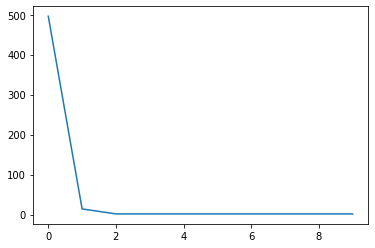

In [137]:
loss_per_epoch2 = history2.history['loss']
plt.plot(range(len(loss_per_epoch2)),loss_per_epoch2)

Evaluation of the CNN model

In [138]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

460/460 [==============================] - 1s 2ms/step


(       Predictions  Actuals
 0        31.567694     30.6
 1        31.414751     31.1
 2        31.198809     30.6
 3        30.954988     31.1
 4        30.817560     30.6
 ...            ...      ...
 14712    27.745991     29.0
 14713    28.337790     29.6
 14714    28.726097     30.0
 14715    29.020538     29.5
 14716    29.364521     29.8
 
 [14717 rows x 2 columns], 1.488060732863677)

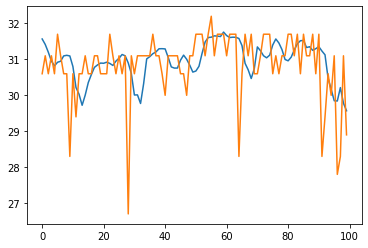

In [139]:
plot_predictions1(model2, X_train1, y_train1)

58/58 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       29.655434     29.0
 1       29.756901     30.5
 2       29.685623     29.0
 3       29.726124     29.2
 4       29.567011     30.2
 ...           ...      ...
 1835    31.798716     30.8
 1836    31.701767     32.5
 1837    31.803888     33.3
 1838    31.854673     28.5
 1839    31.723120     30.3
 
 [1840 rows x 2 columns], 1.264288078720885)

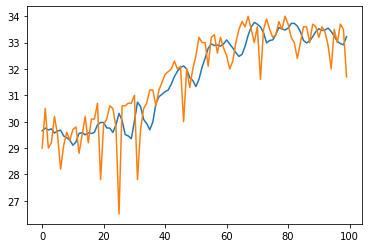

In [140]:
plot_predictions1(model2, X_val1, y_val1)

58/58 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       31.367794     31.9
 1       31.298746     32.8
 2       30.899435     28.5
 3       30.866991     30.9
 4       31.044491     32.4
 ...           ...      ...
 1835    32.157570     31.8
 1836    32.137951     31.5
 1837    31.974134     29.6
 1838    31.666132     30.8
 1839    31.233952     30.1
 
 [1840 rows x 2 columns], 1.115161282239313)

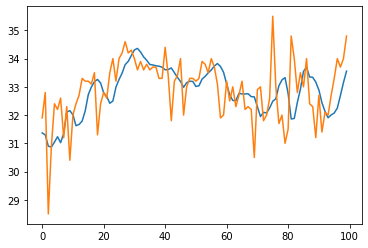

In [141]:
plot_predictions1(model2, X_test1, y_test1)

* CNN model3

In [142]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [143]:
cp3 = ModelCheckpoint('/content/content.drive/MyDrive/colabnotes/weather_temp/model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [144]:
history3=model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
452/460 [============================>.] - ETA: 0s - loss: 744.0361 - root_mean_squared_error: 27.2770

460/460 [==============================] - 12s 18ms/step - loss: 739.1160 - root_mean_squared_error: 27.1867 - val_loss: 476.6224 - val_root_mean_squared_error: 21.8317
Epoch 2/10
459/460 [============================>.] - ETA: 0s - loss: 252.8345 - root_mean_squared_error: 15.9008

460/460 [==============================] - 8s 18ms/step - loss: 252.5735 - root_mean_squared_error: 15.8926 - val_loss: 129.3365 - val_root_mean_squared_error: 11.3726
Epoch 3/10
456/460 [============================>.] - ETA: 0s - loss: 56.2663 - root_mean_squared_error: 7.5011

460/460 [==============================] - 7s 15ms/step - loss: 55.9913 - root_mean_squared_error: 7.4827 - val_loss: 26.1984 - val_root_mean_squared_error: 5.1184
Epoch 4/10
458/460 [============================>.] - ETA: 0s - loss: 10.6733 - root_mean_squared_error: 3.2670

460/460 [==============================] - 9s 19ms/step - loss: 10.6513 - root_mean_squared_error: 3.2636 - val_loss: 7.2153 - val_root_mean_squared_error: 2.6861
Epoch 5/10
459/460 [============================>.] - ETA: 0s - loss: 4.3854 - root_mean_squared_error: 2.0941

460/460 [==============================] - 10s 22ms/step - loss: 4.3840 - root_mean_squared_error: 2.0938 - val_loss: 4.4211 - val_root_mean_squared_error: 2.1026
Epoch 6/10
458/460 [============================>.] - ETA: 0s - loss: 2.6481 - root_mean_squared_error: 1.6273

460/460 [==============================] - 10s 21ms/step - loss: 2.6435 - root_mean_squared_error: 1.6259 - val_loss: 2.5717 - val_root_mean_squared_error: 1.6037
Epoch 7/10
455/460 [============================>.] - ETA: 0s - loss: 1.6773 - root_mean_squared_error: 1.2951

460/460 [==============================] - 8s 18ms/step - loss: 1.6729 - root_mean_squared_error: 1.2934 - val_loss: 1.7139 - val_root_mean_squared_error: 1.3092
Epoch 8/10
455/460 [============================>.] - ETA: 0s - loss: 1.4595 - root_mean_squared_error: 1.2081

460/460 [==============================] - 8s 17ms/step - loss: 1.4550 - root_mean_squared_error: 1.2062 - val_loss: 1.4784 - val_root_mean_squared_error: 1.2159
Epoch 9/10
459/460 [============================>.] - ETA: 0s - loss: 1.3917 - root_mean_squared_error: 1.1797

460/460 [==============================] - 8s 17ms/step - loss: 1.3905 - root_mean_squared_error: 1.1792 - val_loss: 1.3948 - val_root_mean_squared_error: 1.1810
Epoch 10/10
460/460 [==============================] - ETA: 0s - loss: 1.3645 - root_mean_squared_error: 1.1681

460/460 [==============================] - 8s 18ms/step - loss: 1.3645 - root_mean_squared_error: 1.1681 - val_loss: 1.3253 - val_root_mean_squared_error: 1.1512


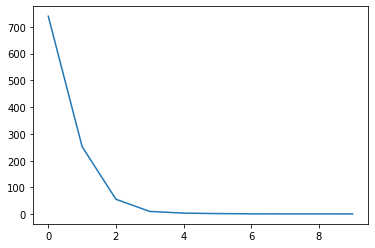

In [145]:
loss_per_epoch3 = history3.history['loss']
plt.plot(range(len(loss_per_epoch3)),loss_per_epoch3)

Evaluation of the GRU model

In [146]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

460/460 [==============================] - 1s 2ms/step


(       Predictions  Actuals
 0        31.137278     30.6
 1        30.783922     31.1
 2        30.973516     30.6
 3        30.855854     31.1
 4        30.971315     30.6
 ...            ...      ...
 14712    28.536551     29.0
 14713    28.862020     29.6
 14714    29.331331     30.0
 14715    29.793741     29.5
 14716    29.768307     29.8
 
 [14717 rows x 2 columns], 1.3477033250894883)

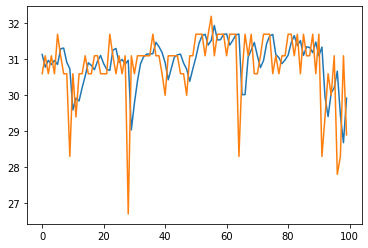

In [147]:
plot_predictions1(model3, X_train1, y_train1)

58/58 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       29.809816     29.0
 1       29.495489     30.5
 2       29.983488     29.0
 3       29.669985     29.2
 4       29.397850     30.2
 ...           ...      ...
 1835    31.716055     30.8
 1836    31.152281     32.5
 1837    31.849894     33.3
 1838    32.663990     28.5
 1839    30.548527     30.3
 
 [1840 rows x 2 columns], 1.3252651293361408)

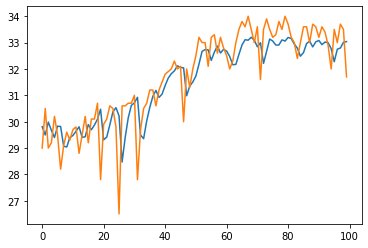

In [148]:
plot_predictions1(model3, X_val1, y_val1)

58/58 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       30.012056     31.9
 1       31.151810     32.8
 2       32.198566     28.5
 3       30.380232     30.9
 4       30.280258     32.4
 ...           ...      ...
 1835    31.942522     31.8
 1836    31.877787     31.5
 1837    31.663662     29.6
 1838    30.587343     30.8
 1839    30.540648     30.1
 
 [1840 rows x 2 columns], 1.074366602082958)

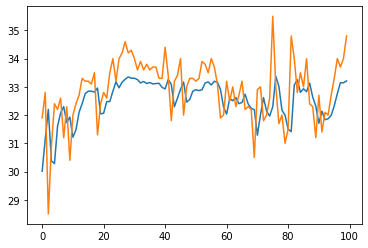

In [149]:
plot_predictions1(model3, X_test1, y_test1)

Conclusion: Univariate forecastting of TMAX 

* The daily forecast of the maximum temprerature with the univariate approach show that LSTM has the highest accuracy. The CNN with 1D convolution is also insteresting to consider as it shows an acceptable accuracy with less parameters to train.

# Multivariate maximum temperature forecasting

* LSTM model4 (multivariate)
* CNN model5 (multivariate)
* GRU model6 (multivariate)

In [150]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
DATE,,
1960-01-01,31.1,-3.156192e+08
1960-01-02,31.7,-3.155328e+08
1960-01-03,31.7,-3.154464e+08
1960-01-04,31.7,-3.153600e+08
1960-01-05,30.6,-3.152736e+08
...,...,...
2011-12-27,31.8,1.324944e+09
2011-12-28,31.5,1.325030e+09
2011-12-29,29.6,1.325117e+09


In [151]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
DATE,,,,,,
1960-01-01,31.1,-315619200.0,2.592924e-12,1.0,-0.009891,0.999951
1960-01-02,31.7,-315532800.0,-3.844949e-13,1.0,0.007311,0.999973
1960-01-03,31.7,-315446400.0,2.760649e-13,1.0,0.024512,0.999700
1960-01-04,31.7,-315360000.0,9.366247e-13,1.0,0.041705,0.999130
1960-01-05,30.6,-315273600.0,1.597185e-12,1.0,0.058885,0.998265


In [152]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
DATE,,,,,
1960-01-01,31.1,2.592924e-12,1.0,-0.009891,0.999951
1960-01-02,31.7,-3.844949e-13,1.0,0.007311,0.999973
1960-01-03,31.7,2.760649e-13,1.0,0.024512,0.999700
1960-01-04,31.7,9.366247e-13,1.0,0.041705,0.999130
1960-01-05,30.6,1.597185e-12,1.0,0.058885,0.998265


In [153]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [154]:
X2, y2 = df_to_X_y2(dfada)
X2.shape, y2.shape

((18396, 6, 5), (18396,))

In [155]:
X_train2, X_rem2, y_train2, y_rem2 = train_test_split(X2,y2, train_size=0.8, random_state=123,shuffle=False)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_rem2,y_rem2, test_size=0.5,random_state=123,shuffle=False)
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((14716, 6, 5), (14716,), (1840, 6, 5), (1840,), (1840, 6, 5), (1840,))

In [156]:
temp_training_mean = np.mean(X_train2[:, :, :])
temp_training_std = np.std(X_train2[:, :, :])
                           
def preprocess(X):
  X[:, :, :] = (X[:, :, :] - temp_training_mean) / temp_training_std
  return X

In [157]:
preprocess(X_train2)
preprocess(X_val2)
preprocess(X_test2)

array([[[ 0.60024129, -1.99398971,  0.09465633,  0.58615418,
          0.58084319],
        [ 0.5587999 , -1.99398971,  0.18582739,  0.58613459,
          0.58472281],
        [ 0.69970062, -1.99398971,  0.20240395,  0.58621588,
          0.59177666],
        [ 0.76600685,  1.81861815,  0.26042189,  0.58634449,
          0.60623706],
        [ 0.3681695 , -0.59327074,  0.12780944,  0.58618854,
          0.58313569],
        [ 0.51735851, -1.99398971, -0.08768578,  0.58613937,
          0.60288648]],

       [[ 0.5587999 , -1.99398971,  0.18582739,  0.58613459,
          0.58472281],
        [ 0.69970062, -1.99398971,  0.20240395,  0.58621588,
          0.59177666],
        [ 0.76600685,  1.81861815,  0.26042189,  0.58634449,
          0.60623706],
        [ 0.3681695 , -0.59327074,  0.12780944,  0.58618854,
          0.58313569],
        [ 0.51735851, -1.99398971, -0.08768578,  0.58613937,
          0.60288648],
        [ 0.64997095, -1.93597177,  0.21069222,  0.58618494,
          0.6

In [158]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                17920     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [161]:
cp4 = ModelCheckpoint('/content/content.drive/MyDrive/colabnotes/weather_temp/model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [169]:
history4=model4.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=20, callbacks=[cp4])

Epoch 1/20
460/460 [==============================] - ETA: 0s - loss: 2.7670 - root_mean_squared_error: 1.6634

460/460 [==============================] - 9s 19ms/step - loss: 2.7670 - root_mean_squared_error: 1.6634 - val_loss: 2.5711 - val_root_mean_squared_error: 1.6034
Epoch 2/20
460/460 [==============================] - ETA: 0s - loss: 1.9380 - root_mean_squared_error: 1.3921

460/460 [==============================] - 9s 19ms/step - loss: 1.9380 - root_mean_squared_error: 1.3921 - val_loss: 1.9346 - val_root_mean_squared_error: 1.3909
Epoch 3/20
450/460 [============================>.] - ETA: 0s - loss: 1.7530 - root_mean_squared_error: 1.3240

460/460 [==============================] - 7s 16ms/step - loss: 1.7752 - root_mean_squared_error: 1.3324 - val_loss: 1.6809 - val_root_mean_squared_error: 1.2965
Epoch 4/20
458/460 [============================>.] - ETA: 0s - loss: 1.7026 - root_mean_squared_error: 1.3048

460/460 [==============================] - 8s 18ms/step - loss: 1.7000 - root_mean_squared_error: 1.3038 - val_loss: 1.5952 - val_root_mean_squared_error: 1.2630
Epoch 5/20
455/460 [============================>.] - ETA: 0s - loss: 1.6104 - root_mean_squared_error: 1.2690

460/460 [==============================] - 10s 21ms/step - loss: 1.6387 - root_mean_squared_error: 1.2801 - val_loss: 1.4722 - val_root_mean_squared_error: 1.2133
Epoch 6/20
453/460 [============================>.] - ETA: 0s - loss: 1.5974 - root_mean_squared_error: 1.2639

460/460 [==============================] - 9s 19ms/step - loss: 1.5885 - root_mean_squared_error: 1.2603 - val_loss: 1.4520 - val_root_mean_squared_error: 1.2050
Epoch 7/20
451/460 [============================>.] - ETA: 0s - loss: 1.5463 - root_mean_squared_error: 1.2435

460/460 [==============================] - 8s 18ms/step - loss: 1.5347 - root_mean_squared_error: 1.2388 - val_loss: 1.2985 - val_root_mean_squared_error: 1.1395
Epoch 8/20
460/460 [==============================] - 3s 7ms/step - loss: 1.4980 - root_mean_squared_error: 1.2239 - val_loss: 1.3604 - val_root_mean_squared_error: 1.1663
Epoch 9/20
454/460 [============================>.] - ETA: 0s - loss: 1.4776 - root_mean_squared_error: 1.2156

460/460 [==============================] - 8s 18ms/step - loss: 1.4723 - root_mean_squared_error: 1.2134 - val_loss: 1.2326 - val_root_mean_squared_error: 1.1102
Epoch 10/20
456/460 [============================>.] - ETA: 0s - loss: 1.4444 - root_mean_squared_error: 1.2018

460/460 [==============================] - 9s 19ms/step - loss: 1.4418 - root_mean_squared_error: 1.2007 - val_loss: 1.1741 - val_root_mean_squared_error: 1.0836
Epoch 11/20
456/460 [============================>.] - ETA: 0s - loss: 1.4161 - root_mean_squared_error: 1.1900

460/460 [==============================] - 10s 21ms/step - loss: 1.4122 - root_mean_squared_error: 1.1883 - val_loss: 1.1652 - val_root_mean_squared_error: 1.0794
Epoch 12/20
451/460 [============================>.] - ETA: 0s - loss: 1.3894 - root_mean_squared_error: 1.1787

460/460 [==============================] - 8s 18ms/step - loss: 1.3842 - root_mean_squared_error: 1.1765 - val_loss: 1.1452 - val_root_mean_squared_error: 1.0701
Epoch 13/20
460/460 [==============================] - 4s 8ms/step - loss: 1.3588 - root_mean_squared_error: 1.1657 - val_loss: 1.1845 - val_root_mean_squared_error: 1.0883
Epoch 14/20
459/460 [============================>.] - ETA: 0s - loss: 1.3385 - root_mean_squared_error: 1.1569

460/460 [==============================] - 10s 21ms/step - loss: 1.3387 - root_mean_squared_error: 1.1570 - val_loss: 1.0585 - val_root_mean_squared_error: 1.0288
Epoch 15/20
460/460 [==============================] - 3s 7ms/step - loss: 1.3181 - root_mean_squared_error: 1.1481 - val_loss: 1.0654 - val_root_mean_squared_error: 1.0322
Epoch 16/20
460/460 [==============================] - 3s 7ms/step - loss: 1.3067 - root_mean_squared_error: 1.1431 - val_loss: 1.1086 - val_root_mean_squared_error: 1.0529
Epoch 17/20
460/460 [==============================] - 4s 8ms/step - loss: 1.2880 - root_mean_squared_error: 1.1349 - val_loss: 1.1013 - val_root_mean_squared_error: 1.0494
Epoch 18/20
454/460 [============================>.] - ETA: 0s - loss: 1.2733 - root_mean_squared_error: 1.1284

460/460 [==============================] - 8s 18ms/step - loss: 1.2714 - root_mean_squared_error: 1.1276 - val_loss: 1.0311 - val_root_mean_squared_error: 1.0155
Epoch 19/20
460/460 [==============================] - 3s 6ms/step - loss: 1.2563 - root_mean_squared_error: 1.1209 - val_loss: 1.0467 - val_root_mean_squared_error: 1.0231
Epoch 20/20
451/460 [============================>.] - ETA: 0s - loss: 1.2505 - root_mean_squared_error: 1.1182

460/460 [==============================] - 9s 19ms/step - loss: 1.2454 - root_mean_squared_error: 1.1160 - val_loss: 1.0183 - val_root_mean_squared_error: 1.0091


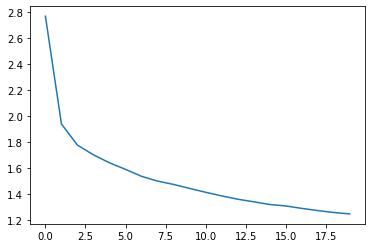

In [170]:
loss_per_epoch4 = history4.history['loss']
plt.plot(range(len(loss_per_epoch4)),loss_per_epoch4)

In [171]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

460/460 [==============================] - 1s 3ms/step


(       Predictions  Actuals
 0        31.502584     31.1
 1        31.620110     30.6
 2        31.467278     31.1
 3        31.238390     30.6
 4        31.142174     31.7
 ...            ...      ...
 14711    27.793640     29.0
 14712    28.112835     29.6
 14713    28.518463     30.0
 14714    28.794796     29.5
 14715    28.962675     29.8
 
 [14716 rows x 2 columns], 1.2238343085681773)

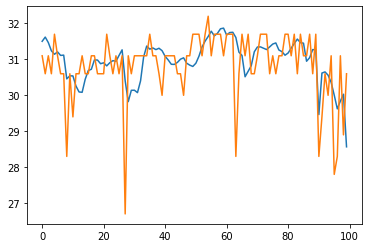

In [172]:
plot_predictions1(model4, X_train2, y_train2)

58/58 [==============================] - 0s 4ms/step


(      Predictions  Actuals
 0       29.179472     29.0
 1       29.246683     30.5
 2       29.295349     29.0
 3       29.344904     29.2
 4       29.359058     30.2
 ...           ...      ...
 1835    31.656683     30.8
 1836    31.615627     32.5
 1837    31.802053     33.3
 1838    30.216629     28.5
 1839    30.473999     30.3
 
 [1840 rows x 2 columns], 1.0182504801187953)

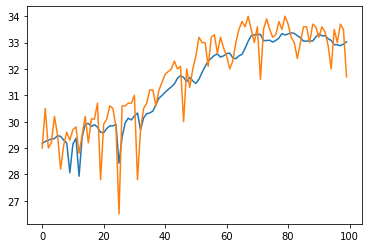

In [173]:
plot_predictions1(model4, X_val2, y_val2)

58/58 [==============================] - 0s 4ms/step


(      Predictions  Actuals
 0       31.032745     31.9
 1       31.434240     32.8
 2       30.759052     28.5
 3       30.880833     30.9
 4       30.990566     32.4
 ...           ...      ...
 1835    32.292027     31.8
 1836    32.277054     31.5
 1837    32.172115     29.6
 1838    31.902874     30.8
 1839    31.744453     30.1
 
 [1840 rows x 2 columns], 0.8693296814968634)

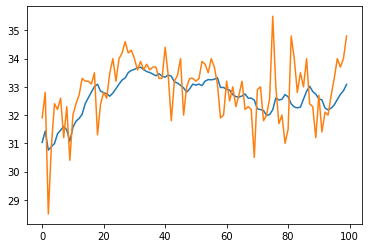

In [174]:
plot_predictions1(model4, X_test2, y_test2)